In [20]:
try :
    import sys, importlib
    importlib.reload(sys.modules['fitpy']) #Script permettant de réimporter une librarie qui vient d'être modifiée
except :
    pass

import fitpy as ft
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Utilisation de la library Fitpy

## Utilisation pour un joueur à un instant donné du match

La fonction prend trois arguments :
    - L'identifiant du match
    - L'identifiant du joueur
    - Un tuple comprenant l'identifiant de la mi-temps, la minute, la seconde

In [54]:
essai = ft.run("Match_002","Player_0053",("2",80,23))
essai

acc_nb  acc_time_med  acc_time_max  acc_dist_km  cour_nb  \
002_0053_2_35'23    56.0           1.4           3.3     0.304188      7.0   

                  cour_time_med  cour_time_max  cour_dist_km  dist_km  \
002_0053_2_35'23            1.9            3.6      0.127948  3.42771   

                  time_played  
002_0053_2_35'23    35.383333

In [35]:
import numpy as np
np.array(essai.iloc[0])

array([1.02000000e+02, 1.40000000e+00, 2.40000000e+00, 1.54915026e+03,
       7.00000000e+00, 1.60000000e+00, 5.70000000e+00, 4.84404121e+02,
       1.90611239e+04, 4.50333333e+01])

## Utilisation sur un match entier

La fonction run a des valeurs par défaut, il est alors possible de l'utiliser sur l'ensemble du match.

Je pourrais modifier le code pour faire uniquement une mi-temps si vous en voyez l'intérêt ! 

In [69]:
essai2 = ft.run("Match_001","Player_0004")
essai2

acc_nb  acc_time_med  acc_time_max    acc_dist  cour_nb  \
001,0004,2,80'20''    44.0          6.85          57.9  562.431884     16.0   

                    cour_time_med  cour_time_max    cour_dist         dist  \
001,0004,2,80'20''          649.7         1836.7  9582.451543  10661.63682   

                    time_played  
001,0004,2,80'20''    91.983333

# Statistique descriptive sur la table fitness

Objectif : juger rapidement la qualité de la construction des données fitness et valider le boulot.

Quelques questions pertinentes : 
    - Nombre de courses moyens/min/max/médian ? (idem accélération)
    - Répartition du nombre de courses ? (idem accélération)
    - Boxplot sur la distance parcouru
    
Liste des variables de la table tracking : 
    - time_sec
    - ht
    - posx
    - posy
    - name_id
    - team_id
    - date_id
    - match_id
    
On code comme si la BDD avait plus de 5 matches pour pouvoir refaire tourner les résultats après coup.
    
## Récupération des données sur 100 joueurs

In [15]:
from fonctions_perso import sql_request
import pandas as pd

In [21]:
%%time

joueur = sql_request("SELECT DISTINCT match_id, name_id FROM tracking")
fitness = ft.run("Match_001","Player_0004")

for index, row in joueur.iterrows():
    if 'match_id' != 'Match_003':
        fitness = pd.concat([fitness, ft.run(row['match_id'], row['name_id'])])
fitness = fitness.iloc[1:,:]

CPU times: user 6min 53s, sys: 16 s, total: 7min 9s
Wall time: 8min 11s


In [22]:
with open(r"M2.2_sauv_fitness.pickle", "wb") as output_file:
    pickle.dump(fitness, output_file)

In [16]:
with open(r"M2.2_sauv_fitness.pickle", "rb") as input_file:
    fitness = pickle.load(input_file)

In [17]:
fitness

acc_nb  acc_time_med  acc_time_max  acc_dist_km  cour_nb  \
001_0088_2_75'20   169.0          1.40           2.7     0.728801      9.0   
001_0029_2_75'20   143.0          1.40           3.6     0.711275     17.0   
001_0056_2_75'20   209.0          1.40           3.3     0.880434      3.0   
001_0004_2_75'20   185.0          1.40           2.6     0.760833     15.0   
001_0035_2_75'20   192.0          1.40           2.9     0.819850     18.0   
001_0034_2_75'20    29.0          1.30           2.2     0.087567      0.0   
001_0032_2_75'20    47.0          1.40           2.2     0.189730      0.0   
001_0030_2_75'20    96.0          1.30           3.4     0.365072      1.0   
001_0063_2_75'20   176.0          1.30           2.7     0.697159      6.0   
001_0083_2_75'20    37.0          1.40           2.8     0.175887      2.0   
001_0060_2_75'20   125.0          1.40           3.1     0.634317     10.0   
001_0036_2_75'20   109.0          1.40           2.7     0.440309      6.0   
001_0070_2_75'20   160.0          1.40           3.2     0.739044     11.0   
001_0085_2_75'20    23.0          1.40           3.8     0.144988      7.0   
001_0021_2_75'20    92.0          1.40           2.8     0.394218      2.0   
001_0067_2_75'20   184.0          1.30           2.5     0.759465     10.0   
001_0040_2_75'20    46.0          1.30           2.3     0.134253      0.0   
001_0087_2_75'20   143.0          1.40           3.0     0.672850     14.0   
001_0073_2_75'20    86.0          1.40           3.0     0.388919      4.0   
001_0047_2_75'20    41.0          1.40           2.5     0.213961      6.0   
001_0079_2_75'20   201.0          1.30           2.7     0.779719      8.0   
001_0010_2_75'20   132.0          1.40           2.6     0.595512      9.0   
001_0044_2_75'20   162.0          1.30           2.4     0.582634      2.0   
001_0025_2_75'20   162.0          1.30           2.5     0.591174      1.0   
001_0005_2_75'20   165.0          1.30           2.9     0.679458     13.0   
001_0092_2_75'20   199.0          1.40           2.8     0.839406      8.0   
001_0061_2_75'20    43.0          1.30           2.2     0.200688      3.0   
001_0090_2_75'20   154.0          1.40           2.5     0.613045      7.0   
002_0088_2_75'20   195.0          1.30           3.2     0.837758     13.0   
002_0029_2_75'20   174.0          1.40           3.1     0.852023     21.0   
...                  ...           ...           ...          ...      ...   
005_0026_2_75'20   175.0          1.40           2.9     0.765957     17.0   
005_0037_2_75'20   131.0          1.30           2.4     0.500289      2.0   
005_0050_2_75'20   139.0          1.40           4.0     0.594283      8.0   
005_0078_2_75'20    37.0          1.40           2.4     0.155426      2.0   
005_0045_2_75'20    83.0          1.40           2.1     0.372725      7.0   
005_0038_2_75'20   174.0          1.30           3.1     0.665310      3.0   
005_0007_2_75'20   139.0          1.50           3.0     0.736522     13.0   
005_0049_2_75'20   131.0          1.30           2.8     0.511622      2.0   
005_0041_2_75'20   167.0          1.30           3.3     0.653668      7.0   
005_0024_2_75'20    24.0          1.35           2.6     0.105413      3.0   
005_0033_2_75'20    70.0          1.40           2.6     0.312671      3.0   
005_0064_2_75'20   186.0          1.40           3.2     0.836066     14.0   
005_0080_2_75'20    45.0          1.30           2.0     0.129083      0.0   
005_0019_2_75'20   178.0          1.30           2.3     0.681440      1.0   
005_0046_2_75'20   154.0          1.40           2.8     0.711963     12.0   
005_0023_2_75'20   160.0          1.40           2.7     0.613998      5.0   
003_0052_2_75'20   136.0          1.40           3.2     0.579766      5.0   
003_0008_2_75'20   177.0          1.30           3.3     0.657243      5.0   
003_0076_2_75'20   255.0          1.30           2.5     0.961613     14.0   
003_0062_2_75'20    42.0          1.40  

## Statistiques univariés

In [12]:
#fitness.columns

summary = fitness.describe().transpose()
summary.loc[['acc_time_max','acc_time_med','cour_time_med','cour_time_max'],:] = summary.loc[['acc_time_max','acc_time_med','cour_time_med','cour_time_max'],:]
summary.loc[['acc_dist_km','dist_km','cour_dist_km'],:] = summary.loc[['acc_dist_km','dist_km','cour_dist_km'],:]

summary.index = ["Nombre d'accélérations",
                 "Durée médiane d'acc (sec)", 
                 "Durée max d'acc (sec)",
                 "Distance cumulée acc (km)",
                 "Nombre de courses course > 25kmh",
                 "Durée médiane course > 25kmh (sec)",
                 "Durée maximale course > 25kmh  (sec)",
                 "Distance cumulée à plus de 25kmh (km)",
                 "Distance (km)",
                 "Temps de jeu (min)"]

decimals = pd.Series([2, 2, 2, 2, 2], index=['mean','std','min','50%','max'])
summary.loc[:,['mean','std','min','50%','max']].round(decimals)


mean    std    min     50%     max
Nombre d'accélérations                 130.84  60.82  10.00  147.50  255.00
Durée médiane d'acc (sec)                1.35   0.06   1.20    1.30    1.50
Durée max d'acc (sec)                    2.80   0.46   1.60    2.75    4.10
Distance cumulée acc (km)                0.56   0.27   0.05    0.64    1.06
Nombre de courses course > 25kmh         7.98   6.10   0.00    7.00   29.00
Durée médiane course > 25kmh (sec)       1.50   0.72   0.00    1.50    4.10
Durée maximale course > 25kmh  (sec)     3.15   1.81   0.00    3.15    8.10
Distance cumulée à plus de 25kmh (km)    0.13   0.11   0.00    0.10    0.59
Distance (km)                            7.91   3.38   0.42    9.25   12.26
Temps de jeu (min)                      74.71  29.64   4.69   91.99   98.09

In [11]:
#fitness.columns

summary = fitness[fitness.time_played > 85].describe().transpose()
summary.loc[['acc_time_max','acc_time_med','cour_time_med','cour_time_max'],:] = summary.loc[['acc_time_max','acc_time_med','cour_time_med','cour_time_max'],:]
summary.loc[['acc_dist_km','dist_km','cour_dist_km'],:] = summary.loc[['acc_dist_km','dist_km','cour_dist_km'],:]

summary.index = ["Nombre d'accélérations",
                 "Durée médiane d'acc (sec)", 
                 "Durée max d'acc (sec)",
                 "Distance cumulée acc (km)",
                 "Nombre de courses course > 25kmh",
                 "Durée médiane course > 25kmh (sec)",
                 "Durée maximale course > 25kmh  (sec)",
                 "Distance cumulée à plus de 25kmh (km)",
                 "Distance (km)",
                 "Temps de jeu (min)"]

decimals = pd.Series([2, 2, 2, 2, 2], index=['mean','std','min','50%','max'])
summary.loc[:,['mean','std','min','50%','max']].round(decimals)


mean    std    min     50%     max
Nombre d'accélérations                 161.00  46.54  29.00  171.00  255.00
Durée médiane d'acc (sec)                1.34   0.05   1.20    1.30    1.40
Durée max d'acc (sec)                    2.85   0.39   1.90    2.80    3.60
Distance cumulée acc (km)                0.68   0.23   0.09    0.71    1.06
Nombre de courses course > 25kmh         9.36   6.56   0.00    8.00   29.00
Durée médiane course > 25kmh (sec)       1.50   0.70   0.00    1.60    3.50
Durée maximale course > 25kmh  (sec)     3.39   1.86   0.00    3.30    7.40
Distance cumulée à plus de 25kmh (km)    0.15   0.12   0.00    0.13    0.59
Distance (km)                            9.82   2.03   3.86   10.30   12.26
Temps de jeu (min)                      94.85   2.94  85.09   93.45   98.09

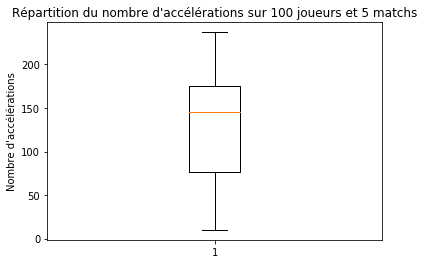

In [103]:
plt.boxplot(fitness.acc_nb)
plt.xlabel('')
plt.ylabel('Nombre d\'accélérations')
plt.title("Répartition du nombre d'accélérations sur 100 joueurs et 5 matchs")
plt.show()

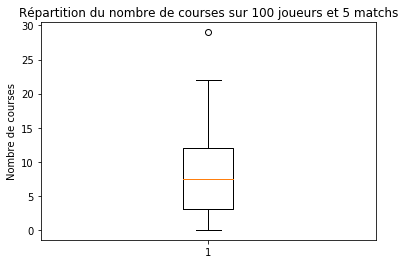

In [102]:
plt.boxplot(fitness.cour_nb)
plt.xlabel('')
plt.ylabel('Nombre de courses')
plt.title("Répartition du nombre de courses sur 100 joueurs et 5 matchs")
plt.show()

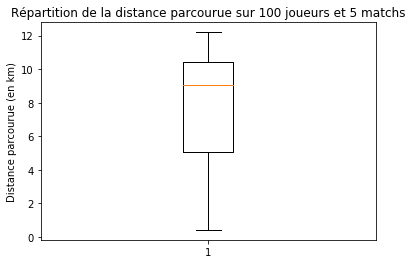

In [101]:
plt.boxplot(fitness.dist_km)
plt.xlabel('')
plt.ylabel('Distance parcourue (en km)')
plt.title("Répartition de la distance parcourue sur 100 joueurs et 5 matchs")
plt.show()

Text(0,0.5,'Distance (km)')

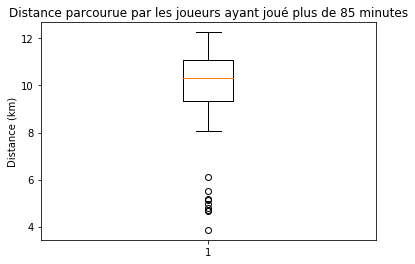

In [14]:
plt.boxplot(fitness[fitness.time_played > 85].dist_km, showfliers=True)
plt.title("Distance parcourue par les joueurs ayant joué plus de 85 minutes")
plt.ylabel("Distance (km)")
#plt.ylim([,13])

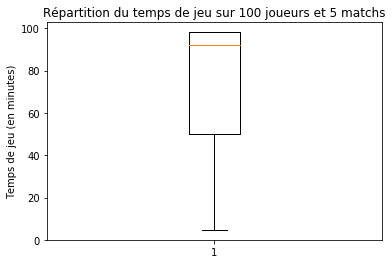

In [100]:
plt.boxplot(fitness.time_played)
plt.xlabel('')
plt.ylabel('Temps de jeu (en minutes)')
plt.title("Répartition du temps de jeu sur 100 joueurs et 5 matchs")
plt.show()

# Corrélation

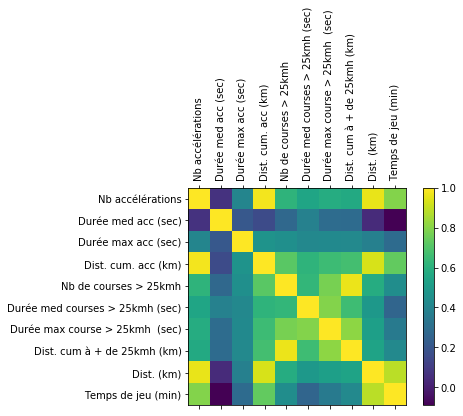

In [7]:
from matplotlib import ticker

alpha = ["", "Nb accélérations",
                 "Durée med acc (sec)", 
                 "Durée max acc (sec)",
                 "Dist. cum. acc (km)",
                 "Nb de courses > 25kmh",
                 "Durée med courses > 25kmh (sec)",
                 "Durée max course > 25kmh  (sec)",
                 "Dist. cum à + de 25kmh (km)",
                 "Dist. (km)",
                 "Temps de jeu (min)"]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(fitness.corr(), interpolation='nearest')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

fig.colorbar(cax)

ax.set_xticklabels(alpha)
plt.xticks(rotation=90)
ax.set_yticklabels(alpha)

plt.show()